In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Multiclass Logistic Regression

* AKA Softmax Regression
* Instead of training N one-vs-all classifier, we can train logistic regression that supports N class

## Probability 
* Each class $k$ has its own parameters $\theta_k$. Combined to form parameter matrix $\Theta$
* First compute each class score

$ s_k(x) = x^T\theta^k $

* Then compute probability of $x$ belonging to class $k$
* AKA softmax function

$ \hat{p}_k = \rho(s(x))_k = \frac{\text{exp}(s_k(x))}{\sum_{j=1}^{K}\text{exp}(s_j(x))}$


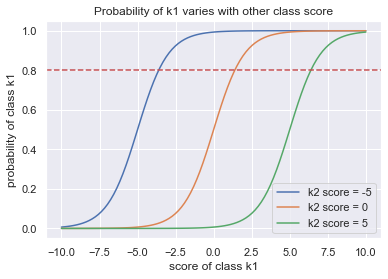

In [2]:
xs = np.linspace(-10,10,100)
plt.plot(xs,np.exp(xs) / (np.exp(xs) + np.exp(-5)), label="k2 score = -5")
plt.plot(xs,np.exp(xs) / (np.exp(xs) + np.exp(0)), label="k2 score = 0")
plt.plot(xs,np.exp(xs) / (np.exp(xs) + np.exp(5)), label="k2 score = 5")
plt.xlabel("score of class k1")
plt.ylabel("probability of class k1")
plt.title("Probability of k1 varies with other class score")
plt.axhline(0.8, color='r', linestyle='--')
plt.legend()
# For the same probability (e.g. 0.8), k1 needs higher score if k2 also yields high score

## Classification
* Choose $k$ where $\hat{p}_k$ has the highest probability
* Only one answer, cannot do multiple answers (e.g. cannot get 2nd, 3rd place scores)

$ \hat{y} = \text{argmax}_k(\rho(s(x)))_k $

## Cost
* Cost is computed from cross-entropy: https://www.youtube.com/watch?v=ErfnhcEV1O8
* Low cost when probability is high for target class, while keep others low

$ J(\Theta) = -1/m \sum_{i=1}^{m} \sum_{k=1}^{K} y^i_k log(\hat{p}^k_i) $

* $y^i_k$ is the target (actual) probability for instance $i$, which is either 0 or 1
* therefore the sum, $\sum_{k=1}^{K} y^i_k log(\hat{p}^k_i)$, would reduce to only 1 term that $k$ is the target
* This reduced to logistic regression cost function when K=2

## Gradient

$\nabla_{\theta^k} J(\Theta) = 1/m\sum_{i=1}^{m}(\hat{p}^i_k - y^i_k)(x^i) $

## Try it out

In [3]:
iris = pd.read_csv("datasets/iris/iris.csv")
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [4]:
X = iris[["petal length (cm)","petal width (cm)"]]
y = iris["target"] #sklearn expects a 1-D array

In [5]:
from sklearn.linear_model import LogisticRegression

# Multinomial instead of 1vsAll, need solver that supports the feature, C is l2 regularization parameter
logreg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

In [6]:
logreg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

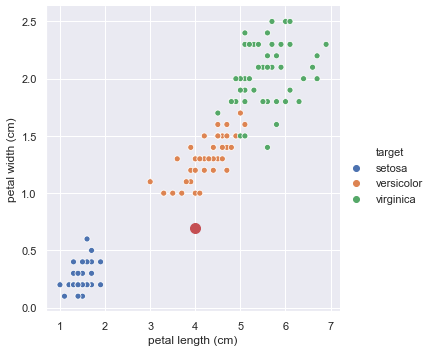

In [7]:
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris)
plt.plot(4,0.7, "ro", markersize=10) # Trying to predict this value

In [8]:
logreg.predict([ [4,0.7] ])

array(['versicolor'], dtype=object)

In [9]:
logreg.predict_proba([ [4,0.7] ])

array([[1.42162835e-03, 9.98532763e-01, 4.56085409e-05]])